In [1]:
import cv2
import os

data_path=r'C:\Users\khosl\OneDrive\Desktop\minor\Sign-To-Speech-Conversion\DATASET'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'test': 0, 'train': 1}
['test', 'train']
[0, 1]


In [2]:
data_path=r'C:\Users\khosl\OneDrive\Desktop\minor\Sign-To-Speech-Conversion\DATASET\train'
classes_path=os.listdir(data_path)
classesf=os.listdir(data_path)
print(classesf)
labels_classes=[i for i in range(len(classesf))]
print(labels_classes)

['0', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


In [3]:
data_path=r'C:\Users\khosl\OneDrive\Desktop\minor\Sign-To-Speech-Conversion\DATASET'

In [4]:
label_classes_dict=dict(zip(classesf,labels_classes))

In [5]:
#print(labels_classes)
#print(categories)
print(label_classes_dict)

{'0': 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25, 'Z': 26}


In [6]:
import numpy as np

In [7]:
img_size=128
data=[]
target=[]
c=0
minValue = 70
for category in categories:
    
    cat_path=os.path.join(data_path,category)
    print(cat_path)
    cat_names=os.listdir(cat_path)
    print(cat_names)
    for classes in cat_names:
        folder_path=os.path.join(data_path,category,classes)
        print(folder_path)
        img_names=os.listdir(folder_path)
        #print(img_names)
        for img_name in img_names:
            #print(img_name)
            img_path=os.path.join(folder_path,img_name)
            img=cv2.imread(img_path)
            
            try:
                gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
                blur = cv2.GaussianBlur(gray,(5,5),2)
                th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
                ret, res = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                #res=np.array(res)
                #print(type(res))
            #Converting the image into gray scale
                resized=cv2.resize(res,(img_size,img_size))
            #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
                data.append(resized)
                #print(data)
                target.append(label_classes_dict[classes])
            except Exception as e:
                print('Exception:',e)
            
            
        
        

C:\Users\khosl\OneDrive\Desktop\minor\Sign-To-Speech-Conversion\DATASET\test
['0', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
C:\Users\khosl\OneDrive\Desktop\minor\Sign-To-Speech-Conversion\DATASET\test\0
C:\Users\khosl\OneDrive\Desktop\minor\Sign-To-Speech-Conversion\DATASET\test\A
C:\Users\khosl\OneDrive\Desktop\minor\Sign-To-Speech-Conversion\DATASET\test\B
C:\Users\khosl\OneDrive\Desktop\minor\Sign-To-Speech-Conversion\DATASET\test\C
C:\Users\khosl\OneDrive\Desktop\minor\Sign-To-Speech-Conversion\DATASET\test\D
C:\Users\khosl\OneDrive\Desktop\minor\Sign-To-Speech-Conversion\DATASET\test\E
C:\Users\khosl\OneDrive\Desktop\minor\Sign-To-Speech-Conversion\DATASET\test\F
C:\Users\khosl\OneDrive\Desktop\minor\Sign-To-Speech-Conversion\DATASET\test\G
C:\Users\khosl\OneDrive\Desktop\minor\Sign-To-Speech-Conversion\DATASET\test\H
C:\Users\khosl\OneDrive\Desktop\minor\Sign-To-Speech-Conversion\DATASET\test

In [8]:
datanp=np.array(data)

In [9]:
datanp.shape

(17113, 128, 128)

In [10]:
targetnp=np.array(target)

targetnp.shape

(17113,)

In [11]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [12]:
new_target.shape

(17113, 27)

In [13]:
np.save('data_img',data)
np.save('target',new_target)

In [14]:
data=np.load('data_img.npy')
target=np.load('target.npy')

In [15]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.2)

In [16]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense , Dropout
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
sz = 128
# Step 1 - Building the CNN

# Initializing the CNN
classifier = Sequential()

# First convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
# Second convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
classifier.add(MaxPooling2D(pool_size=(2, 2)))
#classifier.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
#classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
classifier.add(Flatten())

# Adding a fully connected layer
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=96, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dense(units=27, activation='softmax')) # softmax for more than 2

# Compiling the CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # categorical_crossentropy for more than 2


# Step 2 - Preparing the train/test data and training the model
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28800)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3686528   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [17]:
from keras.callbacks import ModelCheckpoint

In [18]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=classifier.fit(train_data,train_target,shuffle=True,epochs=20,callbacks=[checkpoint],validation_split=0.3)

Epoch 1/20
300/300 [==============================] - 157s 393ms/step - loss: 2.6424 - accuracy: 0.2203 - val_loss: 0.3407 - val_accuracy: 0.9477
INFO:tensorflow:Assets written to: model-001.model\assets
Epoch 2/20
300/300 [==============================] - 90s 300ms/step - loss: 0.7057 - accuracy: 0.7559 - val_loss: 0.0504 - val_accuracy: 0.9910
INFO:tensorflow:Assets written to: model-002.model\assets
Epoch 3/20
300/300 [==============================] - 93s 310ms/step - loss: 0.4179 - accuracy: 0.8612 - val_loss: 0.0296 - val_accuracy: 0.9973
INFO:tensorflow:Assets written to: model-003.model\assets
Epoch 4/20
300/300 [==============================] - 92s 306ms/step - loss: 0.3055 - accuracy: 0.8937 - val_loss: 0.0161 - val_accuracy: 0.9981
INFO:tensorflow:Assets written to: model-004.model\assets
Epoch 5/20
300/300 [==============================] - 96s 322ms/step - loss: 0.2342 - accuracy: 0.9182 - val_loss: 0.0171 - val_accuracy: 0.9968
Epoch 6/20
300/300 [======================

In [19]:
print(classifier.evaluate(test_data,test_target))

107/107 [==============================] - 11s 106ms/step - loss: 0.0037 - accuracy: 0.9991
[0.003669552970677614, 0.9991235733032227]


In [20]:
import matplotlib.pyplot as plt

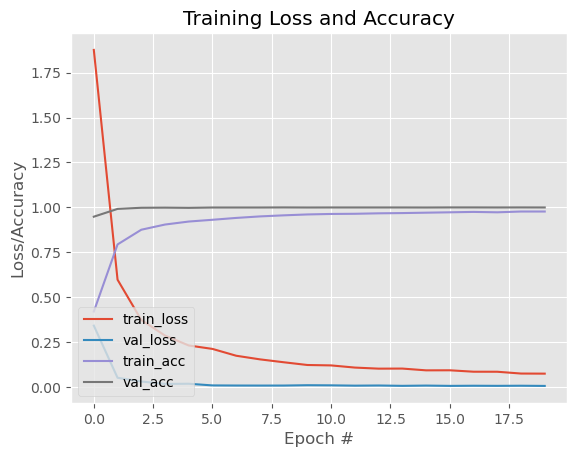

In [21]:
N = 20
H=history
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig('evaluation.png')

In [22]:
# serialize the model to disk
print("[INFO] saving mask detector model...")
classifier.save('asl_classifier.h5')
print("Done !")

[INFO] saving mask detector model...
Done !


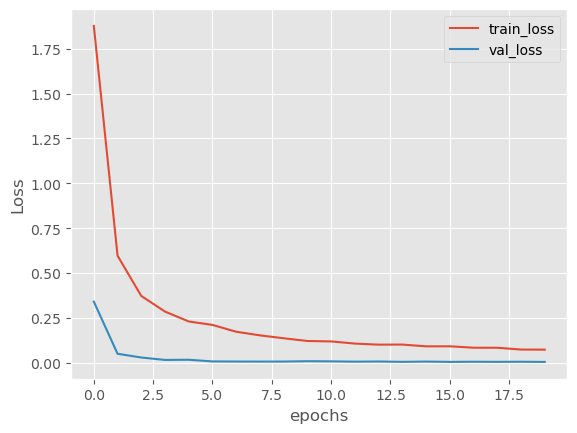

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['train_loss','val_loss'], loc=0)
plt.show()

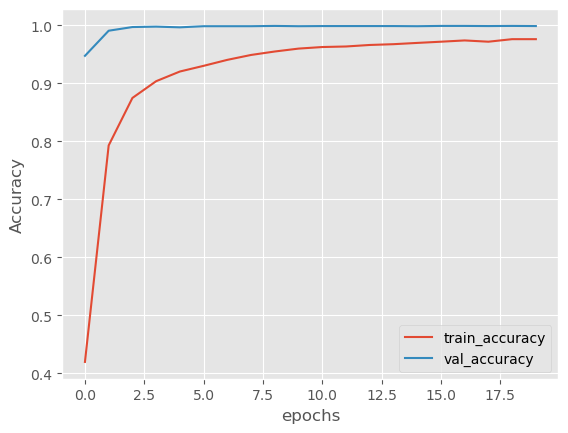

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(['train_accuracy','val_accuracy'], loc=0)
plt.show()

In [25]:
import cv2
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import tensorflow as tf
import keras

In [26]:
pip install playsound

Note: you may need to restart the kernel to use updated packages.


In [27]:
model = keras.models.load_model(r"C:\Users\khosl\OneDrive\Desktop\minor\Sign-To-Speech-Conversion\asl_classifier.h5")

In [28]:
labels_dict = {0:'0', 
                 1:'A', 
                 2:'B', 
                 3:'C', 
                 4:'D', 
                 5:'E',
                 6:'F',
                 7:'G',
                 8:'H',
                 9:'I',
                 10:'J',
                 11:'K',
                 12:'L',
                 13:'M',
                 14:'N',
                 15:'O',
                 16:'P',
                 17:"Q",
                 18:'R',
                 19:'S',
                 20:'T', 
                 21:'U', 
                 22:'V',
                 23:'W',
                 24:'X',
                 25:'Y',
                 26:'Z'}
color_dict=(0,255,0)
x=0
y=0
w=64
h=64

In [29]:
img_size=128
minValue = 70
source=cv2.VideoCapture(0)
count = 0
string = " "
prev = " "
prev_val = 0
while(True):
    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #cv2.rectangle(img,(x,y),(x+w,y+h),color_dict,2)
    cv2.rectangle(img,(24,24),(250 , 250),color_dict,2)
    crop_img=gray[24:250,24:250]
    count = count + 1
    if(count % 100 == 0):
        prev_val = count
    cv2.putText(img, str(prev_val//100), (300, 150),cv2.FONT_HERSHEY_SIMPLEX,1.5,(255,255,255),2) 
    blur = cv2.GaussianBlur(crop_img,(5,5),2)
    th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
    ret, res = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    resized=cv2.resize(res,(img_size,img_size))
    normalized=resized/255.0
    reshaped=np.reshape(normalized,(1,img_size,img_size,1))
    result = model.predict(reshaped)
    #print(result)
    label=np.argmax(result,axis=1)[0]
    if(count == 300):
        count = 99
        prev= labels_dict[label] 
        if(label == 0):
               string = string + " "
            #if(len(string)==1 or string[len(string)] != " "):
             
        else:
                string = string + prev
    
    cv2.putText(img, prev, (24, 14),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2) 
    cv2.putText(img, string, (275, 50),cv2.FONT_HERSHEY_SIMPLEX,0.8,(200,200,200),2)
    cv2.imshow("Gray",res)    
    cv2.imshow('LIVE',img)
    key=cv2.waitKey(1)
    
 
    if(key==27):#press Esc. to exit
        break
print(string)        
cv2.destroyAllWindows()
source.release()

cv2.destroyAllWindows()

 CWWCAJQCOWQQTQHET


In [ ]:
pip install gTTS

In [30]:
from gtts import gTTS 
  
# This module is imported so that we can  
# play the converted audio 
import os 
  
# The text that you want to convert to audio 
  
# Language in which you want to convert 
language = 'en'
# Passing the text and language to the engine,  
# here we have marked slow=False. Which tells  
# the module that the converted audio should  
# have a high speed 
myobj = gTTS(text=string, lang=language, slow=False) 
  
# Saving the converted audio in a mp3 file named 
# welcome  
myobj.save("welcome2121.mp3") 
  
# Playing the converted file 
os.system("welcome.mp3") 

1

In [ ]:
pip install playsound==1.2.2

In [37]:
from playsound import playsound
playsound('welcome2121.mp3')